In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore', 'The parameter \'pretrained\' is deprecated')
warnings.filterwarnings('ignore', 'Arguments other than a weight enum or `None` for \'weights\' are deprecated')

def is_colab():
    for key in os.environ.keys():
        if "COLAB" in key:
            return True
    return False

if is_colab():
  !git clone https://github.com/SoulMind01/FewShot-demo.git
  # Get the current working directory
  current_working_directory = os.getcwd()
  # Add the "my_folder" folder to the import path
  sys.path.append(current_working_directory + "/FewShot-demo")
  from google.colab import drive
  drive.mount('/content/drive')
  json_path = 'FewShot-demo/config.json'
else:
  json_path = 'config.json'

import functions
from functions import do_experiment
from arguments import ARGUMENTS, init_args, reset_args
import matplotlib.pyplot as plt
import numpy as np
from train import train
import importlib

def reload_func():
  importlib.reload(functions)

## Define arguments

In [2]:
args = init_args()

## Do experiments together

In [ ]:
import json
from tqdm import tqdm
num_test_data = 500
class_range = np.arange(0, 10, 1)
test_experiment = False
args = init_args()
args.evaluation_method = 'anomaly_score'

with open(json_path, 'r') as f:
  config = json.load(f)
conf_features = config['features']
conf_feature_ranges = config['feature_ranges']
conf_specify_xticks = config['specify_xticks']


for feature in tqdm(conf_features, desc=f'Running experiment'):
  if not feature in ['num_ref']: continue
  args = reset_args(args)
  experiment_name = f'{feature}_experiment'
  feature_name = feature
  feature_range = np.arange(
    conf_feature_ranges[feature][0],
    conf_feature_ranges[feature][1],
    conf_feature_ranges[feature][2]
  )
  specify_xticks = np.arange(
    conf_specify_xticks[feature][0],
    conf_specify_xticks[feature][1],
    conf_specify_xticks[feature][2]
  ) if feature in conf_specify_xticks else None
  do_experiment(
    args=args,
    experiment_name=experiment_name,
    feature_name=feature_name,
    feature_range=feature_range,
    num_test_data=num_test_data,
    class_range=class_range,
    test_experiment=test_experiment,
    specify_xticks=specify_xticks
  )

## Do light experiment

In [ ]:
args = init_args()
train(args, 100);

## Do experiment along class

In [ ]:
# do_experiment(
#     args=args,
#     experiment_name='class_experiment',
#     feature_name='class',
#     feature_range=np.arange(0, 1, 1), # class experiment do test any feature
#     num_test_data=500,
#     class_range=np.arange(0, 2, 1),
#     test_experiment=True,
#     lock_feature=True, # class experiment do test any feature
#     boxplot=False,
# )

## Do experiment along epochs

In [ ]:
epochs_range = np.arange(4, 14, 1)
do_experiment(
    args=args,
    experiment_name='epochs_experiment',
    feature_name='epochs',
    feature_range=epochs_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
)

## Do experiment along alpha

In [ ]:
args = init_args()
args.evaluation_method = 'closest_dist'

In [ ]:
alpha_range = np.arange(0, 1.1, 0.1)
do_experiment(
    args=args,
    experiment_name='alpha_experiment',
    feature_name='alpha',
    feature_range=alpha_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    test_experiment=False,
    specify_xticks=np.arange(0, 11, 1),
)

## Do experiment along contamination

In [ ]:
contamination_range = np.arange(0, 0.5, 0.05)
do_experiment(
    args=args,
    experiment_name='contamination_experiment',
    feature_name='contamination',
    feature_range=contamination_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    quick_run=False,
    test_experiment=True,
    specify_xticks=np.arange(0, 10, 1),
)

## Do experiment along train dataset size

In [ ]:
args = init_args()

In [ ]:
N_range = np.arange(10, 40, 3)
do_experiment(
    args=args,
    experiment_name='N_experiment',
    feature_name='num_ref',
    feature_range=N_range,
    num_test_data=500,
    class_range=np.arange(0, 1, 1),
)

## Do experiment along train reference dataset size

In [ ]:
k_range = np.arange(1, 10, 1)
do_experiment(
    args=args,
    experiment_name='k_experiment',
    feature_name='k',
    feature_range=k_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    quick_run=False,
    test_experiment=False
)

## Do experiment along test reference dataset size

In [ ]:
num_ref_eval_range = np.arange(2, 11, 1)
do_experiment(
    args=args,
    experiment_name='num_ref_eval_experiment',
    feature_name='num_ref_eval',
    feature_range=num_ref_eval_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
)

## Do experiment along weight decay

In [ ]:
# weight_decay_range = np.arange(0, 1, 0.1)
# do_experiment(
#     args=args,
#     experiment_name='weight_decay_experiment',
#     feature_name='weight_decay',
#     feature_range=weight_decay_range,
#     num_test_data=500,
#     class_range=np.arange(0, 10, 1),
#     test_experiment=False,
#     boxplot=False,
# )

## Do experiment along learning rate

In [ ]:
# learning_rate_range = np.arange(1e-6, 1e-5, 1e-6)
# do_experiment(
#     args=args,
#     experiment_name='learning_rate_experiment',
#     feature_name='learning rate',
#     feature_range=learning_rate_range,
#     num_test_data=500,
#     class_range=np.array(args.normal_class),
#     quick_run=False,
#     test_experiment=False,
#     specify_xticks=np.arange(0, 9, 1),
# )

## Do experiment along vector size

In [ ]:
vector_size_range = np.arange(256, 4097, 256)
do_experiment(
    args=args,
    experiment_name='vector_size_experiment',
    feature_name='vector_size',
    feature_range=vector_size_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    quick_run=False,
    test_experiment=True,
    specify_xticks=np.arange(0, len(vector_size_range), 1),
)

# Comparative experiments

## Compare each distance methods

Results loaded from file
c:\Users\11709\Desktop\PROJECTS\FewShot-demo\anomaly_score_results


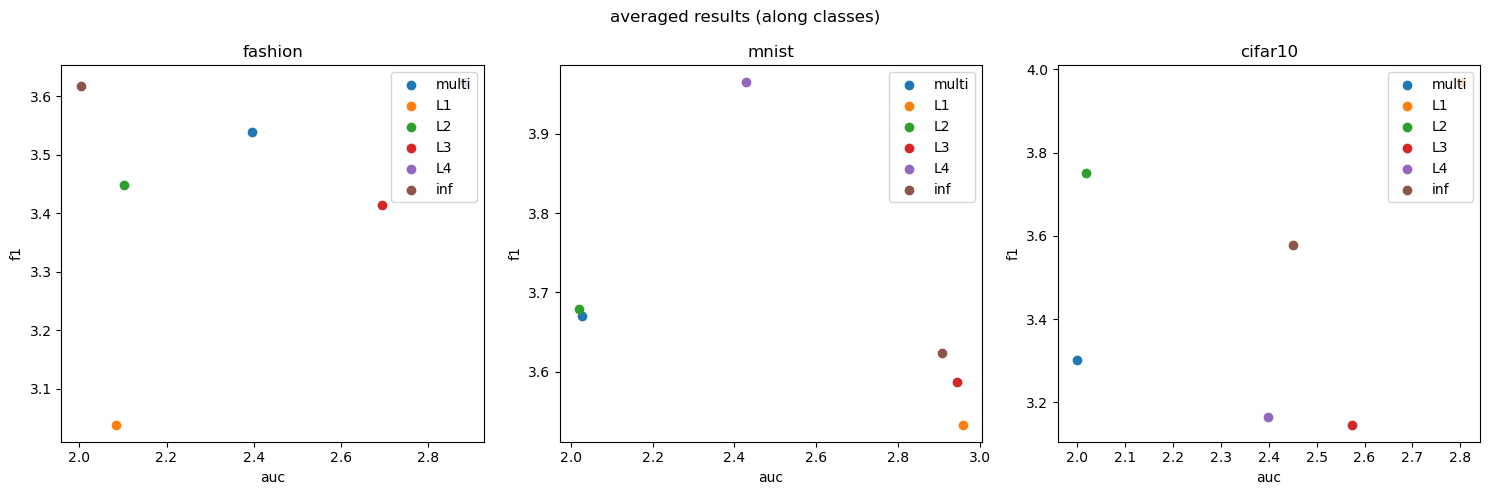

In [3]:
args = init_args()
feature_name = 'distance_method'
feature_range = ['multi', 'L1', 'L2', 'L3', 'L4', 'inf']


experiment_name = f'{feature_name}_experiment'
do_experiment(
    args=args,
    experiment_name=experiment_name,
    feature_name=feature_name,
    feature_range=feature_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    test_experiment=True,
    compare_stats=['auc', 'f1'],
)

## Compare each activation function